In [103]:
# imports
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

#### Loading the images from the data folder 

In [104]:
def load_dataset_with_names(folder_path):
    dataset = []

    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)

        if file_path.endswith(('.png')):
            img = Image.open(file_path)
            img_array = np.array(img)
            parts = filename.split('.')
            subject = parts[0]
            emotion = parts[1]

            img_info = {'image': img_array, 'subject': subject, 'emotion': emotion}

            dataset.append(img_info)

    return dataset


In [105]:
folder_path = 'data/'
image_dataset_raw = load_dataset_with_names(folder_path)

In [106]:
image_dataset_raw[0]

{'image': array([[130, 130, 130, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8),
 'subject': 'subject01',
 'emotion': 'centerlight'}

In [107]:
print(f"Number of images: {len(image_dataset_raw)}")
print(f"shape of Images: {image_dataset_raw[0]['image'].shape}")

Number of images: 165
shape of Images: (243, 320)


#### Preparing the training & testing dataset


* All persons images are being used for the training (8 of 11 pose images for train and 3 of 11 for test)

In [108]:
train_data = {}
test_data = {}
for i in image_dataset_raw:
    train_data[i['subject']] = [img['image'] for img in image_dataset_raw if (img['subject'] == i['subject'] and img['emotion'] not in ['happy', 'sad', 'surprised'])]

    test_data[i['subject']] = [img['image'] for img in image_dataset_raw if (img['subject'] == i['subject'] and img['emotion'] in ['happy', 'sad', 'surprised'])]

In [109]:
train_data.keys()

dict_keys(['subject01', 'subject02', 'subject03', 'subject04', 'subject05', 'subject06', 'subject07', 'subject08', 'subject09', 'subject10', 'subject11', 'subject12', 'subject13', 'subject14', 'subject15'])

In [110]:
print(len(train_data['subject01']))
print(len(test_data['subject01']))

8
3


#### Scaling the pixel values

In [111]:
# scaling the images
train_data = {k: [img/255 for img in v] for k, v in train_data.items()}
test_data = {k: [img/255 for img in v] for k, v in test_data.items()}

In [112]:
train_data['subject01'][0].shape

(243, 320)

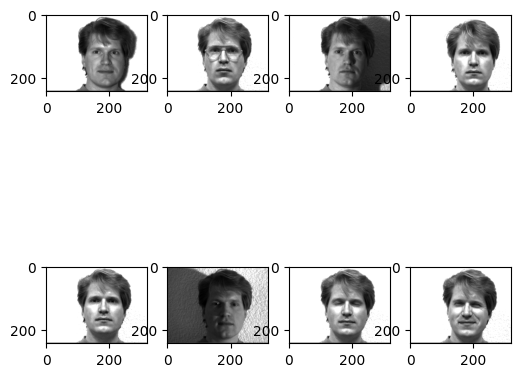

In [113]:
num_images = len(train_data['subject01'])
num_rows = 2
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(train_data['subject01'][i], cmap='gray')
plt.show()

#### Flattening the train_data & test_data

In [114]:
# flatten the images
train_data = {k: [img.flatten() for img in v] for k, v in train_data.items()}
test_data = {k: [img.flatten() for img in v] for k, v in test_data.items()}

In [115]:
print(train_data['subject01'][0].shape)
print(test_data['subject01'][0].shape)

(77760,)
(77760,)


#### Calculating the overall_mean & class_mean

In [116]:
overall_mean = np.mean([img for subject in train_data.values() for img in subject], axis=0)
class_mean = {k: np.mean(v, axis=0) for k, v in train_data.items()}

In [117]:
print(len(class_mean))
print(overall_mean.shape)

15
(77760,)


#### Substracting the class_mean from the train images

In [118]:
train_data_centered = {k: [img - class_mean[k] for img in v] for k, v in train_data.items()}

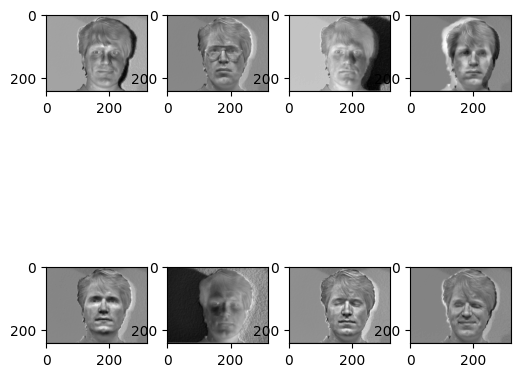

In [120]:
num_images = len(train_data_centered['subject01'])
num_rows = 2
num_cols = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(train_data_centered['subject01'][i].reshape((243, 320)), cmap='gray')
plt.show()

#### Within class scatter matrix

In [102]:
# calculate the within class scatter matrix
